<a href="https://colab.research.google.com/github/shachi-i/Stock-Forecasting/blob/main/stock_market_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv("/content/15 Years Stock Data of NVDA AAPL MSFT GOOGL and AMZN.csv")

In [5]:
 df.head()

,Date,Close_AAPL,Close_AMZN,Close_GOOGL,Close_MSFT,Close_NVDA,High_AAPL,High_AMZN,High_GOOGL,High_MSFT,...,Open_AAPL,Open_AMZN,Open_GOOGL,Open_MSFT,Open_NVDA,Volume_AAPL,Volume_AMZN,Volume_GOOGL,Volume_MSFT,Volume_NVDA
0,2010-01-04,6.440330,6.6950,15.609805,23.254051,0.423884,6.455075,6.8305,15.678546,23.366752,...,6.422875,6.8125,15.614786,23.006108,0.424342,493729600,151998000,78169752,38409100,800204000
1,2010-01-05,6.451465,6.7345,15.541064,23.261557,0.430073,6.487878,6.7740,15.636953,23.366746,...,6.458086,6.6715,15.620515,23.178910,0.422279,601904800,177038000,120067812,49749600,728648000
2,2010-01-06,6.348847,6.6125,15.149294,23.118809,0.432824,6.477046,6.7365,15.587638,23.351725,...,6.451466,6.7300,15.587638,23.201455,0.429844,552160000,143576000,158988852,58182400,649168000
3,2010-01-07,6.337109,6.5000,14.796624,22.878376,0.424342,6.379842,6.6160,15.192630,23.066212,...,6.372319,6.6005,15.177685,23.013616,0.430532,477131200,220604000,256315428,50559700,547792000
4,2010-01-08,6.379242,6.6760,14.993881,23.036165,0.425259,6.379844,6.6840,15.024515,23.201460,...,6.328685,6.5280,14.744323,22.750656,0.420903,447610800,196610000,188783028,51197400,478168000


In [6]:
df.dtypes

,0
Date,object
Close_AAPL,float64
Close_AMZN,float64
Close_GOOGL,float64
Close_MSFT,float64
Close_NVDA,float64
High_AAPL,float64
High_AMZN,float64
High_GOOGL,float64
High_MSFT,float64



DATA VISUALISATION

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

*Line Chart*

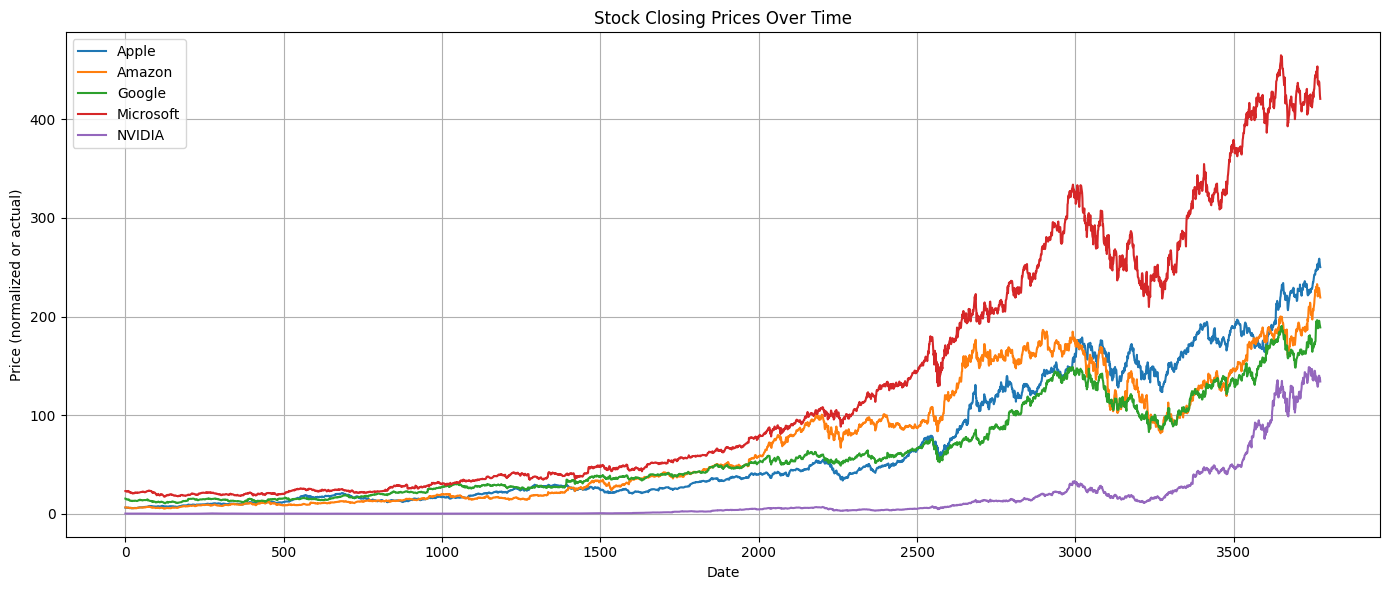

In [8]:
plt.figure(figsize=(14, 6))
plt.plot(df['Close_AAPL'], label='Apple')
plt.plot(df['Close_AMZN'], label='Amazon')
plt.plot(df['Close_GOOGL'], label='Google')
plt.plot(df['Close_MSFT'], label='Microsoft')
plt.plot(df['Close_NVDA'], label='NVIDIA')

plt.title('Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (normalized or actual)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

*KDE plot*

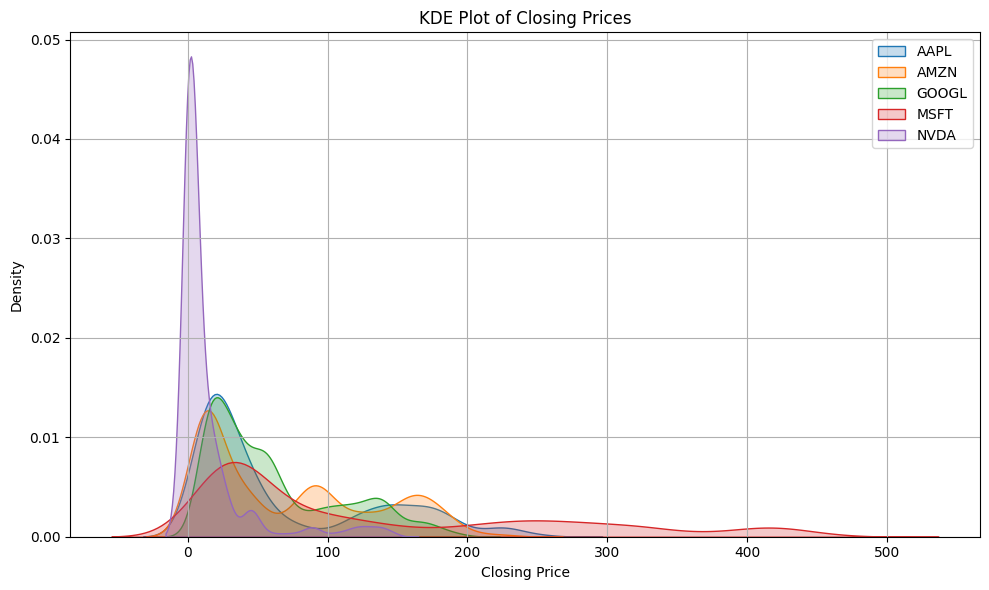

In [9]:
plt.figure(figsize=(10, 6))

sns.kdeplot(df['Close_AAPL'], label='AAPL', fill=True)
sns.kdeplot(df['Close_AMZN'], label='AMZN', fill=True)
sns.kdeplot(df['Close_GOOGL'], label='GOOGL', fill=True)
sns.kdeplot(df['Close_MSFT'], label='MSFT', fill=True)
sns.kdeplot(df['Close_NVDA'], label='NVDA', fill=True)

plt.title('KDE Plot of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

*2D KDE plots*

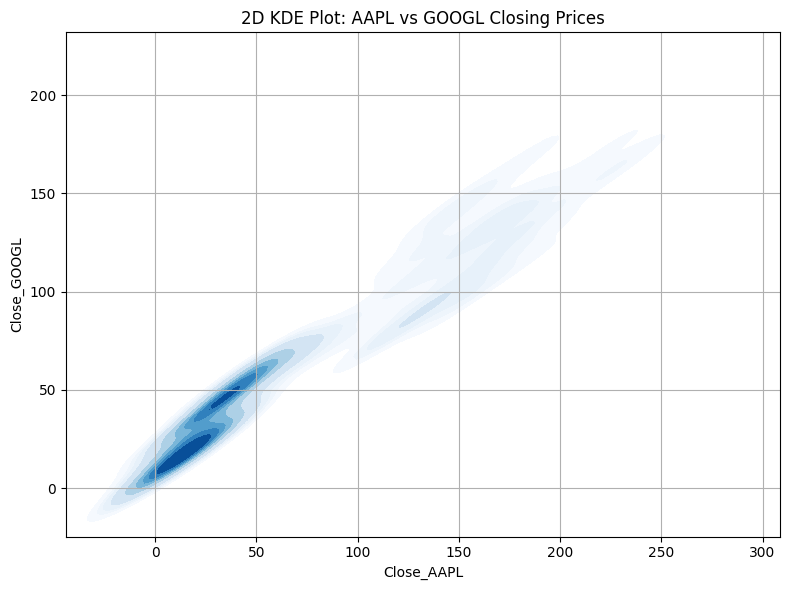

In [10]:
plt.figure(figsize=(8, 6))

sns.kdeplot(
    x=df['Close_AAPL'],
    y=df['Close_GOOGL'],
    cmap="Blues",
    fill=True,
    thresh=0.05
)

plt.title('2D KDE Plot: AAPL vs GOOGL Closing Prices')
plt.xlabel('Close_AAPL')
plt.ylabel('Close_GOOGL')
plt.grid(True)
plt.tight_layout()
plt.show()

Forecasting Models

*Arima*

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
test_result=adfuller(df['Close_MSFT']) #for microsoft

testing if its stationary or non stationary (Microsoft)

In [13]:
def adfuller_test(Close_MSFT):
    result=adfuller(Close_MSFT)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")



adfuller_test(df['Close_MSFT'])

ADF Test Statistic : 1.8676105645839198
p-value : 0.9984740913997996
#Lags Used : 26
Number of Observations : 3747
weak evidence against null hypothesis,indicating it is non-stationary 


testing if its stationary or non stationary (Apple)

In [14]:
def adfuller_test(Close_AAPL):
    result=adfuller(Close_AAPL)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")



adfuller_test(df['Close_AAPL'])

ADF Test Statistic : 1.7035849121700801
p-value : 0.9981373314402529
#Lags Used : 18
Number of Observations : 3755
weak evidence against null hypothesis,indicating it is non-stationary 


testing if its stationary or non stationary (Nvidia)

In [15]:
def adfuller_test(Close_NVDA):
    result=adfuller(Close_NVDA)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")



adfuller_test(df['Close_NVDA'])

ADF Test Statistic : 3.326110260546127
p-value : 1.0
#Lags Used : 29
Number of Observations : 3744
weak evidence against null hypothesis,indicating it is non-stationary 


testing if its stationary or non stationary (Google)

In [16]:
def adfuller_test(Close_GOOGL):
    result=adfuller(Close_GOOGL)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")



adfuller_test(df['Close_GOOGL'])

ADF Test Statistic : 1.5547885343637333
p-value : 0.997715394612739
#Lags Used : 24
Number of Observations : 3749
weak evidence against null hypothesis,indicating it is non-stationary 


In [17]:
# Make sure Date is datetime and set it as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Select the column to forecast
data = df['Close_AAPL'].dropna()


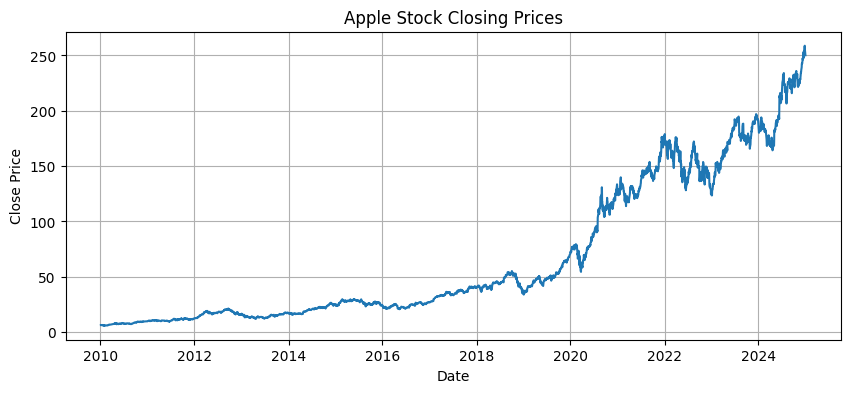

In [18]:
plt.figure(figsize=(10, 4))
plt.plot(data)
plt.title('Apple Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()


In [19]:
df['Sales First Difference'] = df['Close_AAPL'] - df['Close_AAPL'].shift(1)
df['Seasonal First Difference']=df['Close_AAPL']-df['Close_AAPL'].shift(12)
df.head()

,Close_AAPL,Close_AMZN,Close_GOOGL,Close_MSFT,Close_NVDA,High_AAPL,High_AMZN,High_GOOGL,High_MSFT,High_NVDA,...,Open_GOOGL,Open_MSFT,Open_NVDA,Volume_AAPL,Volume_AMZN,Volume_GOOGL,Volume_MSFT,Volume_NVDA,Sales First Difference,Seasonal First Difference
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,6.440330,6.6950,15.609805,23.254051,0.423884,6.455075,6.8305,15.678546,23.366752,0.426864,...,15.614786,23.006108,0.424342,493729600,151998000,78169752,38409100,800204000,NaN,NaN
2010-01-05,6.451465,6.7345,15.541064,23.261557,0.430073,6.487878,6.7740,15.636953,23.366746,0.434658,...,15.620515,23.178910,0.422279,601904800,177038000,120067812,49749600,728648000,0.011136,NaN
2010-01-06,6.348847,6.6125,15.149294,23.118809,0.432824,6.477046,6.7365,15.587638,23.351725,0.433741,...,15.587638,23.201455,0.429844,552160000,143576000,158988852,58182400,649168000,-0.102618,NaN
2010-01-07,6.337109,6.5000,14.796624,22.878376,0.424342,6.379842,6.6160,15.192630,23.066212,0.432366,...,15.177685,23.013616,0.430532,477131200,220604000,256315428,50559700,547792000,-0.011738,NaN
2010-01-08,6.379242,6.6760,14.993881,23.036165,0.425259,6.379844,6.6840,15.024515,23.201460,0.428239,...,14.744323,22.750656,0.420903,447610800,196610000,188783028,51197400,478168000,0.042133,NaN


In [20]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -10.018587201171933
p-value : 1.7026929205674896e-17
#Lags Used : 29
Number of Observations : 3732
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


<Axes: xlabel='Date'>

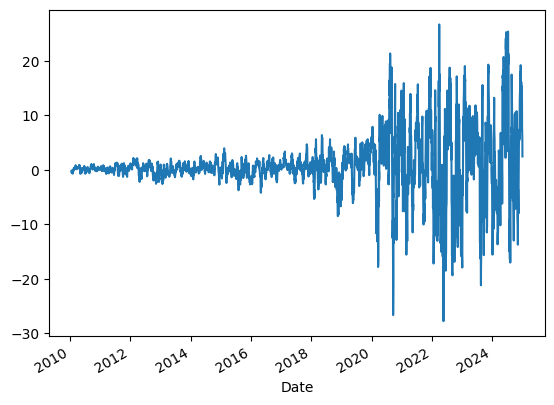

In [21]:
df['Seasonal First Difference'].plot()

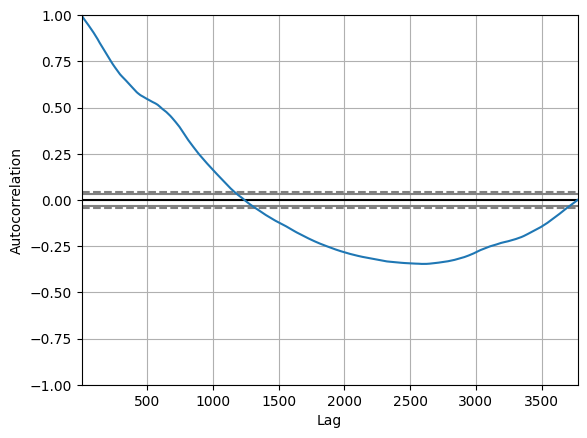

In [22]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Close_MSFT'])
plt.show()

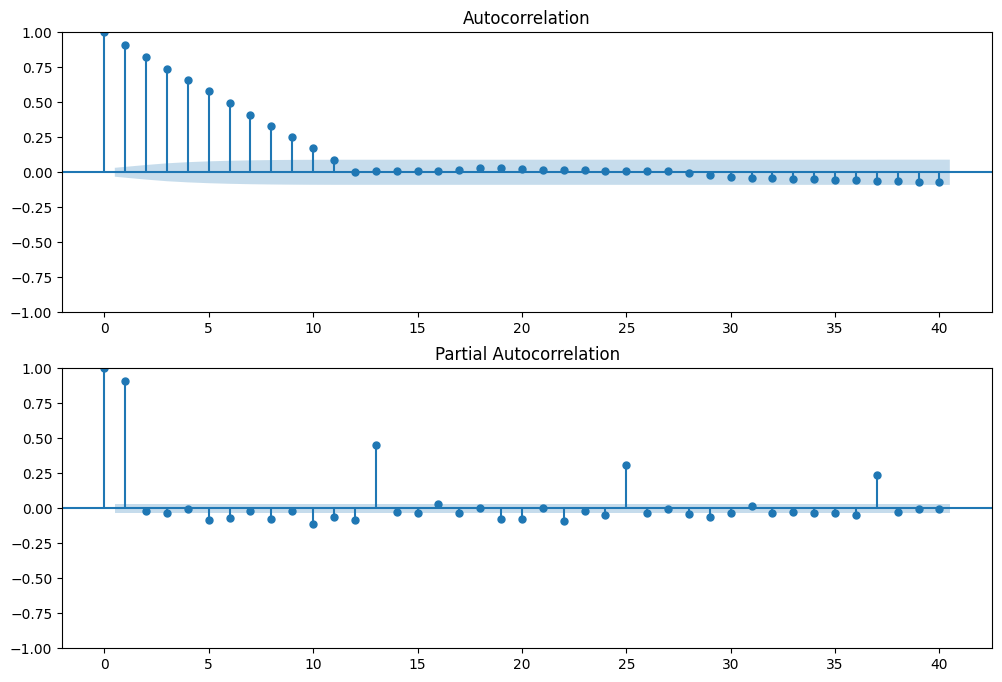

In [23]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].dropna(),lags=40,ax=ax2)

In [24]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df['Close_AAPL'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Close_AAPL   No. Observations:                 3774
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -7081.779
Date:                Wed, 11 Jun 2025   AIC                          14169.559
Time:                        19:06:13   BIC                          14188.265
Sample:                             0   HQIC                         14176.209
                               - 3774                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5492      0.258      2.131      0.033       0.044       1.054
ma.L1         -0.5686      0.255     -2.232      0.026      -1.068      -0.069
sigma2         2.4994      0.023    106.661      0.000       2.453       2.545
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):             17139.34
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):             119.84   Skew:                             0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Date'>

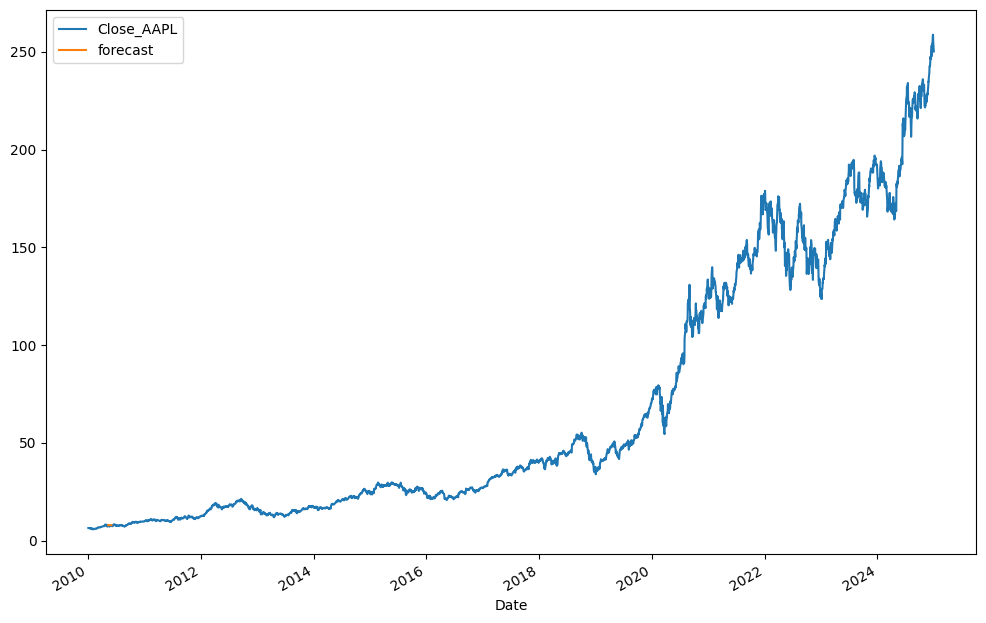

In [25]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Close_AAPL','forecast']].plot(figsize=(12,8))

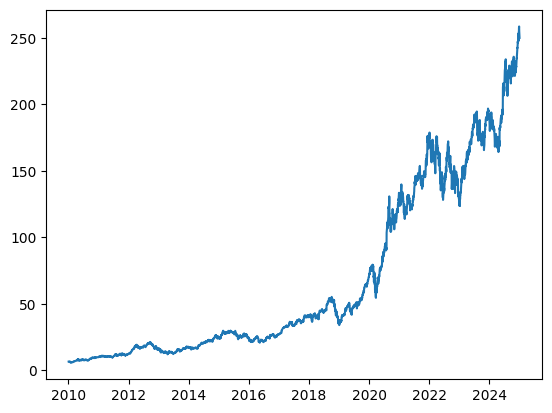

In [26]:
plt.plot(df['Close_AAPL'], label='Actual Apple')

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<Axes: xlabel='Date'>

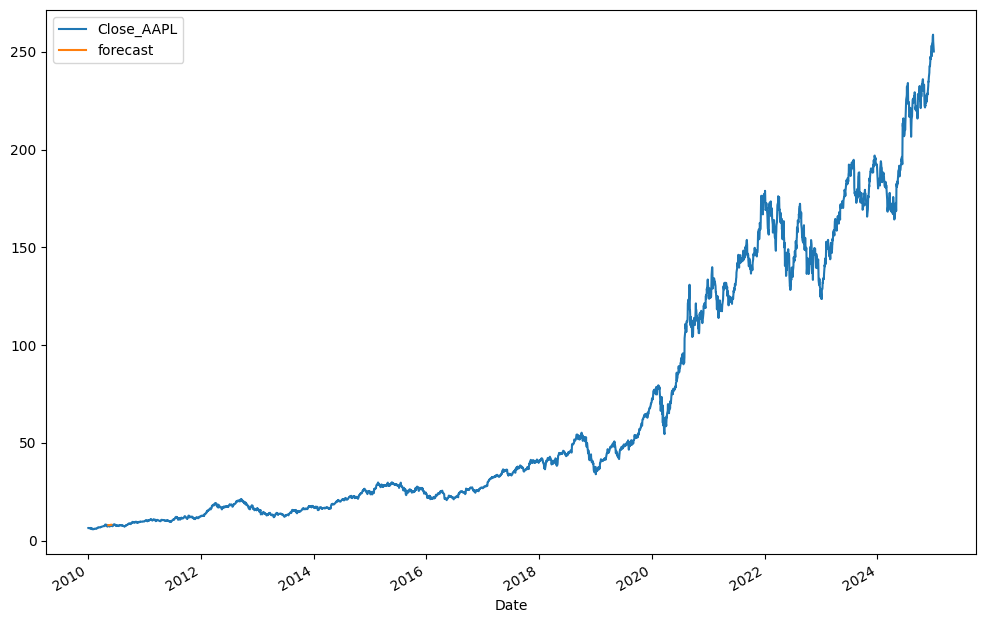

In [27]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Close_AAPL'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Close_AAPL','forecast']].plot(figsize=(12,8))

In [28]:
pip install scikit-learn tensorflow


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.0091
Epoch 2/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 1.1270e-04
Epoch 3/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 9.8741e-05
Epoch 4/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - loss: 9.9991e-05
Epoch 5/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 9.3412e-05
Epoch 6/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 8.4712e-05
Epoch 7/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 9.0817e-05
Epoch 8/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 1.0336e-04
Epoch 9/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 8.4363e-05
Epoch 10/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 8.4361e-05
Epoch 11/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - loss: 6.9848e-05
Epoch 12/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 6.2178e-05
Epoch 13/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 6.0166e-05
Epoch 14/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 5.6990e-05
Epoch 15/20
93/93 ━━━━━━━━━━━

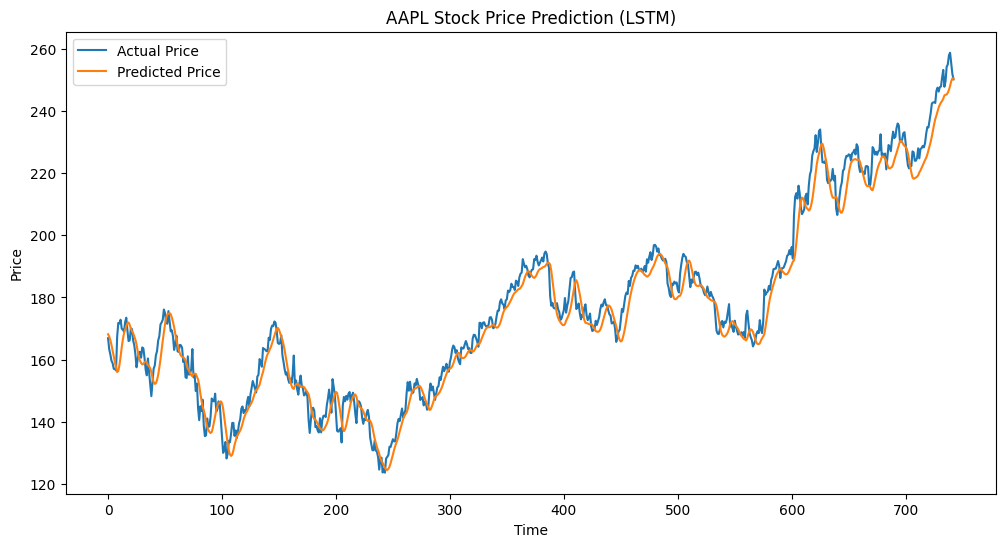

In [29]:

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM


df1 = df.reset_index()[['Date', 'Close_AAPL']].dropna()



scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Close_AAPL']])



def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

seq_len = 60
X, y = create_sequences(scaled_data, seq_len)

X = np.reshape(X, (X.shape[0], X.shape[1], 1))


train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')


model.fit(X_train, y_train, epochs=20, batch_size=32)


predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
actual = scaler.inverse_transform(y_test.reshape(-1, 1))


plt.figure(figsize=(12,6))
plt.plot(actual, label="Actual Price")
plt.plot(predictions, label="Predicted Price")
plt.title("AAPL Stock Price Prediction (LSTM)")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()


In [30]:

data = df['Close_AAPL'].dropna()

train_size_arima = int(len(data) * 0.8)
train_data = data[:train_size_arima]
test_data = data[train_size_arima:]


model=ARIMA(train_data,order=(1,1,1))
model_fit=model.fit()

start_index = len(train_data)
end_index = len(data) - 1
forecast = model_fit.predict(start=start_index, end=end_index)


y1_true = test_data.values
y1_pred = forecast.values

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

for arima

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae1 = mean_absolute_error(y1_true, y1_pred)
mse1 = mean_squared_error(y1_true, y1_pred)
rmse1 = np.sqrt(mse1)
mape1 = np.mean(np.abs((y1_true - y1_pred) / y1_true)) * 100
r2_1 = r2_score(y1_true, y1_pred)

print(f"MAE: {mae1:.2f}")
print(f"MSE: {mse1:.2f}")
print(f"RMSE: {rmse1:.2f}")
print(f"MAPE: {mape1:.2f}%")
print(f"R²: {r2_1:.2f}")


MAE: 23.25
MSE: 873.53
RMSE: 29.56
MAPE: 13.18%
R²: -0.00


In [34]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


model1 = Sequential()
model1.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model1.add(LSTM(50))
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mean_squared_error')


model1.fit(X_train, y_train, epochs=20, batch_size=32)


predictions = model1.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
actual = scaler.inverse_transform(y_test.reshape(-1, 1))


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - loss: 0.0051
Epoch 2/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 1.2921e-04
Epoch 3/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 76ms/step - loss: 1.2123e-04
Epoch 4/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 1.2497e-04
Epoch 5/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 9.5074e-05
Epoch 6/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 9.7240e-05
Epoch 7/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - loss: 8.2225e-05
Epoch 8/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 8.3645e-05
Epoch 9/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 7.1834e-05
Epoch 10/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 8.6318e-05
Epoch 11/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - loss: 7.0195e-05
Epoch 12/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - loss: 7.6319e-05
Epoch 13/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 6.2406e-05
Epoch 14/20
93/93 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - loss: 6.2783e-05
Epoch 15/20
93/93 ━━━━━━━

for lstm

In [41]:

y_pred_scaled = model1.predict(X_test)


y_pred = scaler.inverse_transform(y_pred_scaled)
y_true = scaler.inverse_transform(y_test.reshape(-1, 1))

y_true = y_true.flatten()
y_pred = y_pred.flatten()
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y1_true, y1_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
r2 = r2_score(y_true, y_pred)


print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"R²: {r2:.2f}")

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
MAE: 3.83
MSE: 873.53
RMSE: 4.83
MAPE: 2.19%
R²: 0.97
